In [1]:
import pandas as pd
import numpy as np

In [2]:
data =pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.head()  #shows the first 5 rows.

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape #gives number of rows & columns.

(13320, 9)

In [5]:
data.info() #gives column names, types, and null count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

In [7]:
#null values
data.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [8]:
data.drop(columns=['area_type', 'availability','society','balcony'],inplace=True)

In [9]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
data.info() # shows structure again after dropping columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
data['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [12]:
data['location'] = data['location'].fillna('Sarjapur Road')

In [13]:
data['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [14]:
data['size'] = data['size'].fillna('2 BHK')

In [15]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [17]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [18]:
data[data.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def convertRange(x):

  temp = x.split('_')
  if len(temp)==2:
    return(float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None


In [21]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [22]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
# Price per Square feet

In [24]:
data['price_per_sqft']=data['price'] *100000 / data['total_sqft']

In [25]:
data['price_per_sqft']

,price_per_sqft
0,3699.810606
1,4615.384615
2,4305.555556
3,6245.890861
4,4250.000000
...,...
13315,6689.834926
13316,11111.111111
13317,5258.545136
13318,10407.336319


In [26]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [27]:
data['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Mango Garden Layout,1
Milk Colony,1
"Basnashankari,6th stage,",1


In [28]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [29]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

,count
location,
1st Block Koramangala,10
Dairy Circle,10
Nagadevanahalli,10
Sadashiva Nagar,10
Naganathapura,10
...,...
Xavier Layout,1
Ramanagara Channapatna,1
Maheswari Nagar,1


In [30]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [31]:
data['location'].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Tindlu,11
Marsur,11
2nd Phase Judicial Layout,11


In [32]:
# Outlier detection and removal

In [33]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [34]:
(data['total_sqft']/data['bhk']).describe()

,0
count,13073.000000
mean,573.254923
std,389.887823
min,0.250000
25%,472.000000
50%,551.000000
75%,625.000000
max,26136.000000


In [35]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,1590.166773,2.561441,111.444236,2.651472,6322.476758
std,1261.827604,1.072551,152.759322,0.973754,4187.479096
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1118.000000,2.000000,49.340000,2.000000,4207.119741
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.483548
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [36]:
data.shape

(12329, 7)

In [37]:
data.price_per_sqft.describe()

,price_per_sqft
count,12329.000000
mean,6322.476758
std,4187.479096
min,267.829813
25%,4207.119741
50%,5300.000000
75%,6938.483548
max,176470.588235


In [38]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,1590.166773,2.561441,111.444236,2.651472,6322.476758
std,1261.827604,1.072551,152.759322,0.973754,4187.479096
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1118.000000,2.000000,49.340000,2.000000,4207.119741
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.483548
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [39]:
data.shape

(12329, 7)

In [40]:
data.price_per_sqft.describe()

,price_per_sqft
count,12329.000000
mean,6322.476758
std,4187.479096
min,267.829813
25%,4207.119741
50%,5300.000000
75%,6938.483548
max,176470.588235


In [41]:
def remove_outliners_sqft(df):
  df_output=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)

    st=np.std(subdf.price_per_sqft)

    gen_df= subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_output= pd.concat([df_output,gen_df],ignore_index = True)
  return df_output
data =remove_outliners_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000
mean,1502.725758,2.471880,91.104765,2.573525,5669.621675
std,873.997461,0.971938,86.241338,0.893533,2274.739750
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4242.424242
50%,1283.000000,2.000000,67.000000,2.000000,5183.823529
75%,1650.000000,3.000000,100.000000,3.000000,6451.612903
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [42]:
def bhk_outlier_remover(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std' : np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }

    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [43]:
data=bhk_outlier_remover(data)

In [44]:
data.shape

(10153, 7)

In [45]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10148,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10149,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10150,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10151,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [46]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

In [47]:
# Cleaned Data

In [48]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [49]:
data.to_csv("Cleaned_data.csv")

In [50]:
X=data.drop(columns=['price'])
y=data['price']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
print(X_train.shape)
print(X_test.shape)

(8122, 4)
(2031, 4)


In [54]:
# Applying Linear Regression

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [56]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)

In [57]:
scaler = StandardScaler()

In [58]:
pipe = Pipeline([
    ('transformer', column_trans),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [59]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [60]:
y_pred_lr=pipe.predict(X_test)

In [61]:
from sklearn.metrics import r2_score

# Predict test set results
y_pred = pipe.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8057189829561986


In [62]:
# Applying Lasso

In [63]:
lasso = Lasso()

In [64]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [65]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [66]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.7971081825428273

In [67]:
#Applying Ridge

In [68]:
ridge =Ridge()

In [69]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [70]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [71]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.805756111162916

In [72]:
print("No Regularization: ", r2_score(y_test, y_pred_lr))
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))

No Regularization:  0.8057189829561986
Lasso:  0.7971081825428273
Ridge:  0.805756111162916


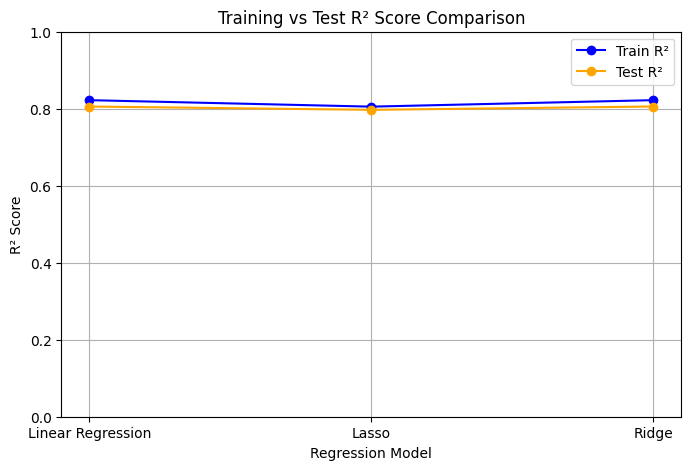

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Recreate and fit models with separate names to avoid overwriting
# Linear Regression
pipe_lr = Pipeline([
    ('transformer', column_trans),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipe_lr.fit(X_train, y_train)

# Lasso
pipe_lasso = Pipeline([
    ('transformer', column_trans),
    ('scaler', StandardScaler()),
    ('model', Lasso())
])
pipe_lasso.fit(X_train, y_train)

# Ridge
pipe_ridge = Pipeline([
    ('transformer', column_trans),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
pipe_ridge.fit(X_train, y_train)

# R² scores
train_scores = [
    r2_score(y_train, pipe_lr.predict(X_train)),
    r2_score(y_train, pipe_lasso.predict(X_train)),
    r2_score(y_train, pipe_ridge.predict(X_train))
]

test_scores = [
    r2_score(y_test, pipe_lr.predict(X_test)),
    r2_score(y_test, pipe_lasso.predict(X_test)),
    r2_score(y_test, pipe_ridge.predict(X_test))
]

# Plot
models = ['Linear Regression', 'Lasso', 'Ridge']

plt.figure(figsize=(8, 5))
plt.plot(models, train_scores, marker='o', label='Train R²', color='blue')
plt.plot(models, test_scores, marker='o', label='Test R²', color='orange')
plt.title('Training vs Test R² Score Comparison')
plt.xlabel('Regression Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

In [74]:
#All three models perform similarly, with R² scores around 0.80 – 0.83
#Ridge Regression has: High training accuracy , Very close test accuracy , Means least overfitting
#Lasso has slightly lower accuracy, likely due to reducing too many features

In [75]:
import pickle

In [76]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))

In [77]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle

# Load the trained model
pipe = pickle.load(open("RidgeModel.pkl", "rb"))

# Load cleaned data to extract locations
data = pd.read_csv("Cleaned_data.csv")
location_list = sorted(data['location'].unique())

# Prediction function
def predict_price(location, sqft, bath, bhk):
    input_df = pd.DataFrame([[location, sqft, bath, bhk]],
                            columns=['location', 'total_sqft', 'bath', 'bhk'])
    prediction = pipe.predict(input_df)[0]
    return f"Predicted Price: ₹ {round(prediction, 2)} Lakhs"

# Gradio UI
gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(location_list, label="Location"),
        gr.Number(label="Total Square Feet"),
        gr.Slider(1, 10, step=1, label="Number of Bathrooms"),
        gr.Slider(1, 10, step=1, label="BHK")
    ],
    outputs=gr.Textbox(label="Result"),
    title=" House Price Prediction",
    description="Enter the details below to get the estimated price of a house."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://31f691cb22154f20cb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
